# Mappeoppgave 5 - python

## Skrap data fra nettet:

Vi starter med å laste inn et verktøy som heter `BeutifulSoup`. Med dette verktøyet kan du enkelt finne de taggene du ønsker.

In [1]:
from bs4 import BeautifulSoup
import requests

def fetch_html_tables(url):
    "Returns a list of tables in the html of url"
    page = requests.get(url)
    bs=BeautifulSoup(page.content)
    tables=bs.find_all('table')
    return tables

tables=fetch_html_tables('https://www.data-to-viz.com/story/ThreeNum.html')
table_html=tables[0]

#printing top
print(str(table_html)[:1000])

<table class="table table-striped" style="width: auto !important; margin-left: auto; margin-right: auto;">
<thead>
<tr>
<th style="text-align:left;">
country
</th>
<th style="text-align:left;">
continent
</th>
<th style="text-align:right;">
lifeExp
</th>
<th style="text-align:right;">
pop
</th>
<th style="text-align:right;">
gdpPercap
</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:left;">
Afghanistan
</td>
<td style="text-align:left;">
Asia
</td>
<td style="text-align:right;">
43.8
</td>
<td style="text-align:right;">
31.89
</td>
<td style="text-align:right;">
975
</td>
</tr>
<tr>
<td style="text-align:left;">
Albania
</td>
<td style="text-align:left;">
Europe
</td>
<td style="text-align:right;">
76.4
</td>
<td style="text-align:right;">
3.60
</td>
<td style="text-align:right;">
5937
</td>
</tr>
<tr>
<td style="text-align:left;">
Algeria
</td>
<td style="text-align:left;">
Africa
</td>
<td style="text-align:right;">
72.3
</td>
<td style="text-align:right;">
33.33
</td>
<td sty

Det vi får ut med `bs.find_all('table')` er altså en liste med alle partier i teksten med matchende `<table>`-`</table>`-tagger. I dette dokumentet er det bare én tabell, så listen har bare ett element. Vi må nå søke videre inne i tabellen etter innholdstaggene. Vi bruker samme funksjon til det. Her er to funksjoner som sammen finner innholdstaggene og returnerer en tabell:

In [2]:
def html_to_table(html):
    "Returns the table defined in html as a list"
    #defining the table:
    table=[]
    #iterating over all rows
    for row in html.find_all('tr'):
        r=[]
        #finding all cells in each row:
        cells=row.find_all('td')
        
        #if no cells are found, look for headings
        if len(cells)==0:
            cells=row.find_all('th')
            
        #iterate over cells:
        for cell in cells:
            cell=format(cell)
            r.append(cell)
        
        #append the row to t:
        table.append(r)
    return table

def format(cell):
    "Returns a string after converting bs4 object cell to clean text"
    if cell.content is None:
        s=cell.text
    elif len(cell.content)==0:
        return ''
    else:
        s=' '.join([str(c) for c in cell.content])
        
    #here you can add additional characters/strings you want to 
    #remove, change punctuations or format the string in other
    #ways:
    s=s.replace('\xa0','')
    s=s.replace('\n','')
    return s

table=html_to_table(table_html)

#printing top
print(str(table)[:1000])

[['country', 'continent', 'lifeExp', 'pop', 'gdpPercap'], ['Afghanistan', 'Asia', '43.8', '31.89', '975'], ['Albania', 'Europe', '76.4', '3.60', '5937'], ['Algeria', 'Africa', '72.3', '33.33', '6223'], ['Angola', 'Africa', '42.7', '12.42', '4797'], ['Argentina', 'Americas', '75.3', '40.30', '12779'], ['Australia', 'Oceania', '81.2', '20.43', '34435']]


Den første funksjonen itererer over tabellceller, mens den andre funksjonen konverterer innholdet fra et bs4-objekt med html-kode til leselig tekst. 

Vi har nå skrapet siden, og hentet ut tabellen. For å gjøre den mer leselig, kan vi lagre den som en fil. Når vi lager filer i python bruker vi den innebygde `open`-funksjonen. Om vi kaller filen for "DataToViz.csv", kan vi opprette filen ved å kjøre `f=open('DataToViz.csv','w')`. Strengen `'w'` betyr at vi åpner filen for skriving (*writing*, i motsetning til lesing/*reading* markert med `'r'`. Vi fyller filen med innhold med `f.write()`. 

For å skille kolonnene skal vi her bruke semikolon ';'. Python har en enkel måte å konvertere en liste til en streng med skilletegn. En tar utgangspunkt i skilletegnet, og bruker metoden `join()` på det. For eksempel: 

In [3]:
';'.join(table[0])

'country;continent;lifeExp;pop;gdpPercap'

Vi kan nå åpne filen for skriving og iterere over rader og skrive dem til filen. 

In [4]:
def save_data(file_name,table):
    "Saves table to file_name"
    f=open(file_name,'w')
    for row in table:
        f.write(';'.join(row)+'\n')
    f.close()
    
save_data('DataToViz.csv',table)

Vi kan ta en kikk på dataene med Pandas (`encoding='latin1'` er for å få med æ,ø,å):

In [5]:
import pandas as pd
pd.read_csv('DataToViz.csv', delimiter=';', encoding='latin1')

,country,continent,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,43.8,31.89,975
1,Albania,Europe,76.4,3.60,5937
2,Algeria,Africa,72.3,33.33,6223
3,Angola,Africa,42.7,12.42,4797
4,Argentina,Americas,75.3,40.30,12779
5,Australia,Oceania,81.2,20.43,34435


## Statsmodels:

In [6]:
import pandas as pd
g = pd.read_csv("DataToViz.csv", sep=";")#reading data
g

,country,continent,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,43.8,31.89,975
1,Albania,Europe,76.4,3.60,5937
2,Algeria,Africa,72.3,33.33,6223
3,Angola,Africa,42.7,12.42,4797
4,Argentina,Americas,75.3,40.30,12779
5,Australia,Oceania,81.2,20.43,34435


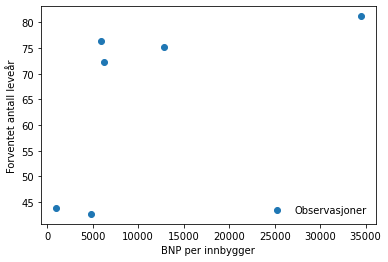

In [7]:
from matplotlib import pyplot as plt

fig,ax=plt.subplots()

#adding axis lables:
ax.set_ylabel('Forventet antall leveår')
ax.set_xlabel('BNP per innbygger')

#plotting the function:
ax.scatter(g['gdpPercap'], g['lifeExp'],  label='Observasjoner')
ax.legend(loc='lower right',frameon=False)

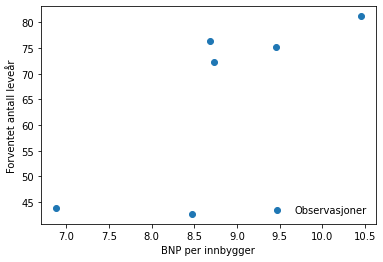

In [8]:
import numpy as np
from matplotlib import pyplot as plt

fig,ax=plt.subplots()

#adding axis lables:
ax.set_ylabel('Forventet antall leveår')
ax.set_xlabel('BNP per innbygger')

#plotting the function:
ax.scatter(np.log(g['gdpPercap']), g['lifeExp'],  label='Observasjoner')
ax.legend(loc='lower right',frameon=False)

In [9]:
y=g['lifeExp']
pd.DataFrame(y)

,lifeExp
0,43.8
1,76.4
2,72.3
3,42.7
4,75.3
5,81.2


In [10]:
x=pd.DataFrame(np.log(g['gdpPercap']))
x['intercept']=1
x

,gdpPercap,intercept
0,6.882437,1
1,8.688959,1
2,8.736007,1
3,8.475746,1
4,9.455558,1
5,10.446829,1


Vi kan nå estimere hvilke koefisienter $\alpha$ og $\beta$ som passer best til dataene. Da bruker vi `OLS` fra `statsmodels`og sette inn y og x: 

In [11]:
from statsmodels.regression.linear_model import OLS

res=OLS(y,x).fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     6.252
Date:                Fri, 01 Apr 2022   Prob (F-statistic):             0.0667
Time:                        08:12:59   Log-Likelihood:                -22.251
No. Observations:                   6   AIC:                             48.50
Df Residuals:                       4   BIC:                             48.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
gdpPercap     11.4746      4.589      2.500      0.0

/azhome/vfu005@ad.uit.no/.local/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Over ser vi resultatet av regresjonen. Det vi bør legge spesielt merke til er kolonnen under `coef`, som viser estimatene. Vi ser at $\alpha=-35.4743$ og $\beta=11.4746$. Disse tallene er lagret i res.params:

In [12]:
res.params

gdpPercap    11.474611
intercept   -35.474337
dtype: float64

Vi kan derfor bruke `res.params` til å plotte linjen $\alpha+\beta \cdot x$

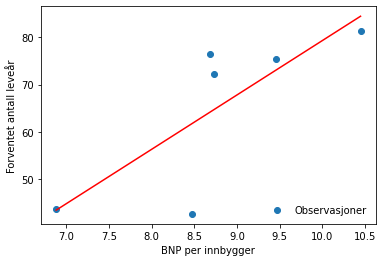

In [13]:
x=np.linspace(min(np.log(g['gdpPercap'])), max(np.log(g['gdpPercap'])), 100)

regression_line=res.params['intercept']+res.params['gdpPercap']*x

ax.plot(x, regression_line,color='red') 

fig

Vi ser at regresjonslinjen passer svært godt til dataene. Siden vi har brukt OLS vet vi at dette er den linjen som har minst avstand i gjennomsnitt til alle punktene. "Avstand" måles som kvadrate av den vertikale differansen. Matematisk kan vi skrive det slik:

$y=\alpha+\beta \cdot x+\epsilon$

der $\alpha+\beta \cdot x$ er linjen og $\epsilon$ er den vertikale avstanden til linjen.

I grafen over ser vi på om det er sammenhengen mellom BNP per innbygger og antall leveår. Grafen viser  altså at høyere BNP per innbygger fører til større forventet levealder. 
Selv om det kun er plottet 7 observasjoner får vi informasjon utifra grafen.

## Sources:

Espen Sirnes (2022) 9 - webskraping med python (version 1.0)
[Source code]. https://github.com/espensirnes/notebooks/9-webskraping-med-python

Espen Sirnes (2022) 10 - statsmodels (version 1.0)
[Source code]. https://github.com/espensirnes/notebooks/10-statsmodels